In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stock=pd.read_csv('S&P500_Stock_Data.csv')

In [6]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


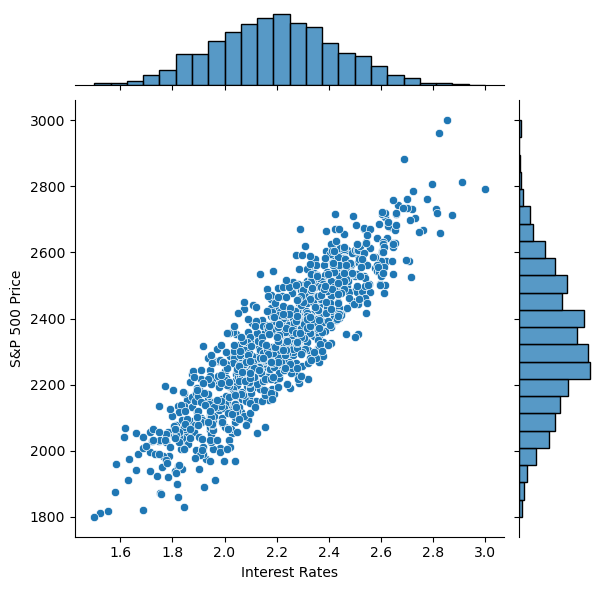

In [13]:
sns.jointplot(x='Interest Rates',y='S&P 500 Price',data=stock)

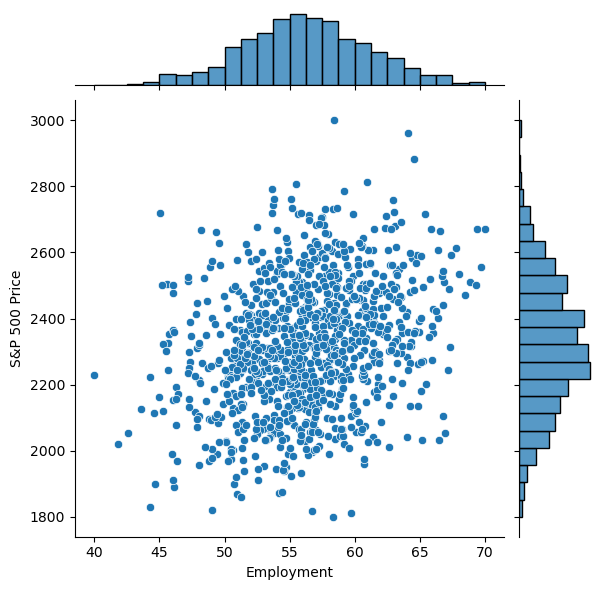

In [14]:
sns.jointplot(x='Employment',y='S&P 500 Price',data=stock)

In [18]:
X=stock[['Interest Rates','Employment']]


In [17]:
y=stock['S&P 500 Price']

[['Interest Rates', 'Employment']]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20)

In [43]:
y_test

751    2390.351844
311    2091.145495
155    2352.982842
708    2482.830269
783    2604.705284
          ...     
362    2730.081332
126    2257.011706
60     2380.778616
79     2594.060850
360    2961.657934
Name: S&P 500 Price, Length: 200, dtype: float64

In [33]:
from sklearn.linear_model import LinearRegression


In [35]:
regressor=LinearRegression(fit_intercept=True)

In [36]:
regressor.fit(X_train,y_train)

LinearRegression()

In [39]:
y_predict=regressor.predict(X_test)

In [44]:
y_predict

array([2263.79115076, 2127.09981981, 2328.65625966, 2496.41701786,
       2487.58483048, 2294.36054008, 2346.92338422, 2055.2554237 ,
       2489.47812613, 2245.35258958, 2313.98915876, 2225.53233395,
       2018.18201176, 2192.82274374, 2398.16643336, 2361.46385175,
       2335.65374247, 2283.95522305, 2474.0497282 , 1844.85914743,
       2003.1781314 , 2311.90823628, 2383.82888077, 2274.49755457,
       2198.13067669, 2484.72604351, 2644.90026589, 2286.5620794 ,
       2110.42819411, 2331.60323273, 2441.34210872, 2370.68579559,
       1895.90577921, 2203.01952301, 2385.10434553, 2272.995978  ,
       2067.98252355, 2586.65315269, 2618.80088557, 2341.99881947,
       2440.55933938, 2478.67105697, 2110.07409892, 2015.89097496,
       2471.0227851 , 2257.18247514, 2201.80273353, 2601.14743455,
       2096.48204016, 2254.2216887 , 1991.90837297, 2371.78094251,
       2306.06403237, 2422.00898895, 2224.95107826, 2704.55749053,
       1893.21129876, 2137.10260339, 2134.01586796, 2214.58049

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

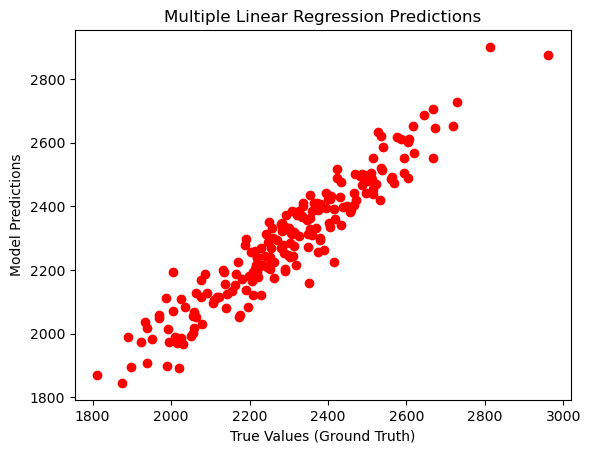

In [45]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [48]:
k = X_test.shape[1]
n = len(X_test)

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  )*100

In [50]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  62.032 
MSE = 3847.9225768146316 
MAE = 50.16443888098703 
R2 = 0.9031070617940793 
Adjusted R2 = 0.9021233771422426 
MAPE = 2.2033501848917525


# Visualize the results

In [51]:
from mpl_toolkits.mplot3d import Axes3D

In [52]:
x_surf, y_surf = np.meshgrid( np.linspace( stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100),  np.linspace(stock['Employment'].min(), stock['Employment'].max() , 100))

In [53]:
onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()    } ) 

In [54]:
fittedY = regressor.predict(onlyX)

In [55]:
fittedY = fittedY.reshape(x_surf.shape)

Text(0.5, 0, 'Stock index price')

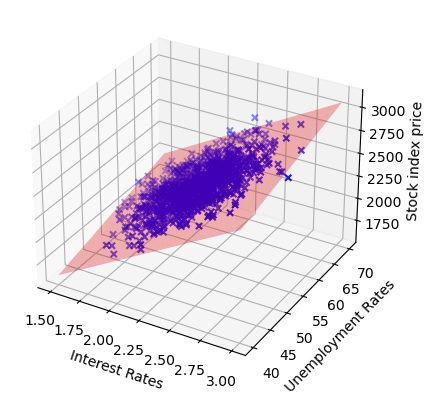

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( stock['Interest Rates'], stock['Employment'] , stock['S&P 500 Price'] , c = 'blue', marker ='x'  )
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')

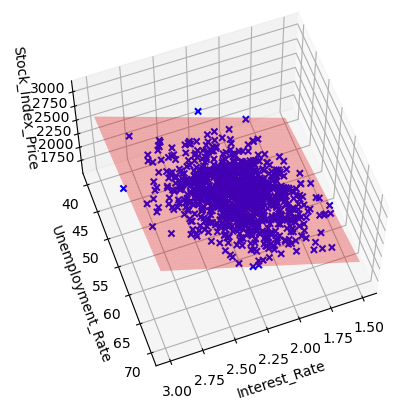

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(60, 70)
plt.show()